In [7]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import kipy
from kipy.board import BoardLayer as BL
import shapely.geometry as sg

import breakneck.conversions as bnc


In [9]:
import build123d as bd
import ocp_vscode as ocp
ocp.set_port(3939)


In [10]:
import kitfg.kitfg as kf
import kitfg.config as kfc

cfg = kfc.parse_config('halpi2.toml')


In [11]:
board = kipy.KiCad().get_board()
footprints = kf.get_annotation_footprints(board)
edge = kf.get_edge(board)


In [12]:
shapes = board.get_shapes()


In [13]:
edge_shapes = [shape for shape in shapes if shape.layer == BL.BL_Edge_Cuts]
edges = bnc.as_polygons(edge_shapes, 1000)
edge0 = edges[0]
outline = sg.LinearRing(edge0.exterior.coords)
buffered = outline.buffer(0.5*1e6)


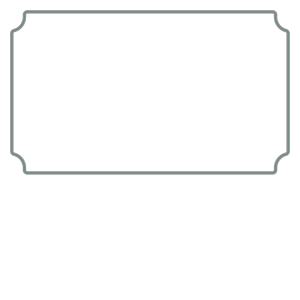

In [14]:
display(buffered)


In [15]:
annotation_positions = kf.get_annotation_positions(footprints)


In [16]:
smd_pads = kf.get_test_point_smd_pads(board)
tht_pads = kf.get_tht_pads(board)


In [17]:
unannotated_smd_pads = kf.get_unannotated(smd_pads, footprints)
unannotated_tht_pads = kf.get_unannotated(tht_pads, footprints)


In [18]:
if cfg.project.test_point_auto_annotation_type:
    annotation_positions[cfg.project.test_point_auto_annotation_type].extend(
        pad.position for pad in unannotated_smd_pads
    )

if cfg.project.tht_pad_auto_annotation_type:
    annotation_positions[cfg.project.tht_pad_auto_annotation_type].extend(
        pad.position for pad in unannotated_tht_pads
    )


In [19]:
plates = kf.render_plates(cfg, annotation_positions, edge)


2025-03-16 16:23:51.214 | DEBUG    | kitfg.kitfg:apply_operation:277 - Adding counterbore hole with diameter 3.2 and counterbore parameters (6.0, 4.0, 8.0)
2025-03-16 16:23:52.875 | DEBUG    | kitfg.kitfg:apply_operation:277 - Adding counterbore hole with diameter 5.2 and counterbore parameters (6.0, 1.0, 4.0)


In [20]:
ocp.show(plates[0])


+


In [25]:

ocp.show(bd.Location((0, 0, -15)) * plates[0] + plates[1] + bd.Location((0, 0, 50)) * plates[2])


+


In [57]:
length = 35.
near = 6.
far = 3.

part = kf.render_pressure_pin(length, 2.9, 10, near, far, 1)

ocp.show(part)


c


In [18]:
part = bd.Part()
part += bd.Cylinder(radius=5, height=0.1)
part += bd.CounterBoreHole(
    radius=1.6,
    counter_bore_radius=3.0,
    counter_bore_depth=4.0,
    depth=8.0,
    mode=bd.Mode.ADD,
)

ocp.show(part)


+
